In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

[0.00337355] 6.183668099292802 0.9813233285479052


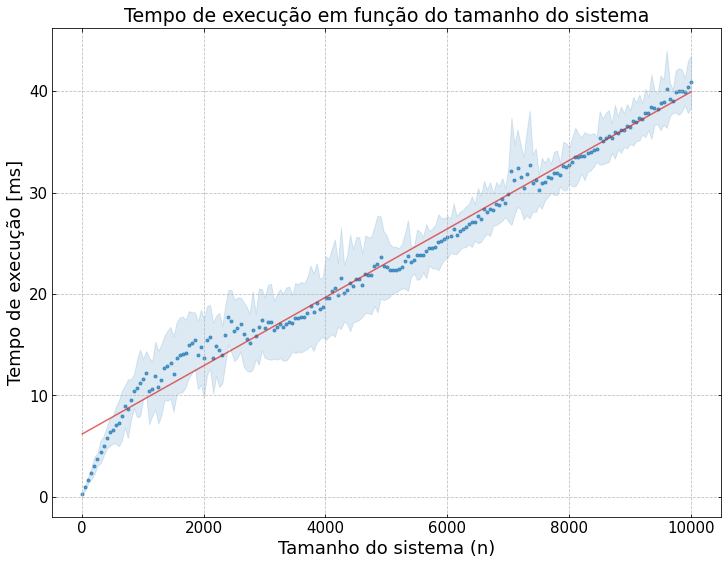

In [3]:
times = np.load('times2.npy')
times *= 1e-6

n = np.array(list(range(5, 10006, 50)))

mean = np.mean(times, axis=-1)
std = np.std(times, axis=-1)

model = LinearRegression()
model.fit(n.reshape(-1,1), mean)
a = model.coef_
b = model.intercept_
est = a * n + b

print(a, b, model.score(n.reshape(-1, 1), mean))

low = mean - std
high = mean + std

plt.figure(figsize=(12, 9))
plt.scatter(n, mean, marker='.', alpha=0.7)
plt.plot(n, est, color='tab:red', alpha=0.7)
plt.fill_between(n, low, high, color='tab:blue', alpha=.15)
plt.xlabel('Tamanho do sistema (n)', fontsize=18)
plt.ylabel('Tempo de execução [ms]', fontsize=18)
plt.title('Tempo de execução em função do tamanho do sistema', fontsize=19)
plt.gca().tick_params(axis='both', direction='in', labelsize=15, right=True, top=True)
plt.grid(alpha=0.8, linestyle='--')
plt.savefig('tempo2.pdf', pad_inches=0.05, bbox_inches='tight')